In [66]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# PyTorchの活性化関数
定義域を制御することが必要
## とりあえず実装するもの
- torch.nn.functional.sigmoid: シグモイド関数
- torch.nn.functional.softmax: ソフトマックス関数
- torch.nn.functional.tanh: ハイパボリックタンジェント関数 (tanh)
- torch.nn.functional.relu: ReLU (Rectified Linear Unit)
- torch.nn.functional.leaky_relu: Leaky ReLU
- torch.nn.functional.gelu: ガウスエラー型線形活性化関数 (GELU)
---
## その他の活性化関数
<detail>
- torch.nn.functional.elu: Exponential Linear Unit (ELU)
- torch.nn.functional.selu: Scaled Exponential Linear Unit (SELU)
- torch.nn.functional.prelu: Parametric ReLU
- torch.nn.functional.relu6: ReLU6
- torch.nn.functional.hardtanh: HardTanh
- torch.nn.functional.softplus: ソフトプラス関数
- torch.nn.functional.softshrink: ソフトシュリンク関数
- torch.nn.functional.hardsigmoid: Hard Sigmoid
- torch.nn.functional.logsigmoid: Log Sigmoid
- torch.nn.functional.softsign: ソフトサイン関数
- torch.nn.functional.tanhshrink: Tanh Shrinkage
- torch.nn.functional.hardshrink: Hard Shrinkage
- torch.nn.functional.log_softmax: Log Softmax
- torch.nn.functional.silu: SiLU (Sigmoid-Weighted Linear Unit, Swish)
- torch.nn.functional.mish: Mish Activation
- torch.nn.functional.hardswish: Hard Swish
- torch.nn.functional.swish: Swish Activation
- torch.nn.functional.silu: SiLU (Sigmoid-Weighted Linear Unit, Swish)
- torch.nn.functional.mish: Mish Activation
</detail>

# Sigmoid Function

In [67]:
x = sp.symbols('x')
# シグモイド関数の定義
sigmoid = 1 / (1 + sp.exp(-x))
# テイラー展開を行う点
a = 0
# テイラー展開の次数
n_terms = 15
# テイラー展開を計算
taylor_expansion = sp.series(sigmoid, x, a, n_terms)
# 結果を表示
print(f"シグモイド関数のテイラー展開 ({n_terms} terms) around x = {a}: {taylor_expansion}")

シグモイド関数のテイラー展開 (15 terms) around x = 0: 1/2 + x/4 - x**3/48 + x**5/480 - 17*x**7/80640 + 31*x**9/1451520 - 691*x**11/319334400 + 5461*x**13/24908083200 + O(x**15)


In [68]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return (1-sigmoid(x))*sigmoid(x)

def approximated_sigmoid(x):
    return 1/2 + x/4 - x**3/48# + x**5/480 - 17*x**7/80640 + 31*x**9/1451520 - 691*x**11/319334400 + 5461*x**13/24908083200

def approximated_sigmoid_derivative(x):
    return (1-approximated_sigmoid(x))*approximated_sigmoid(x)

In [69]:
x = np.arange(-10, 10, 0.1)
y = sigmoid(x)
y_prime = sigmoid_derivative(y)
y_approx = approximated_sigmoid(x)
y_prime_approx = approximated_sigmoid_derivative(y)

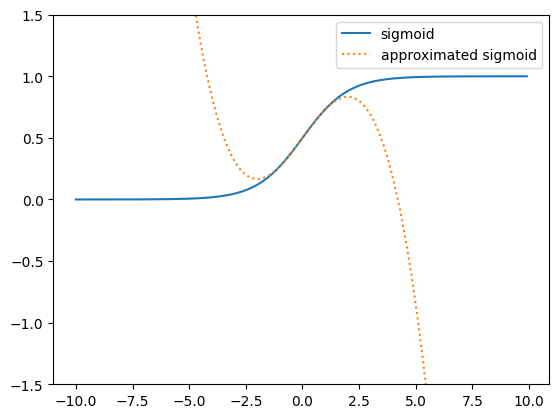

In [70]:
plt.plot(x, y, label='sigmoid')
plt.plot(x, y_approx, label='approximated sigmoid', linestyle='dotted')
plt.ylim(-1.5, 1.5)
plt.legend()
plt.show()

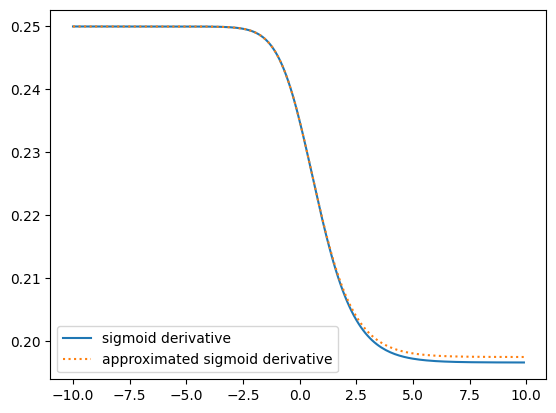

In [71]:
plt.plot(x, y_prime, label='sigmoid derivative')#, linestyle='dotted')
plt.plot(x, y_prime_approx, label='approximated sigmoid derivative', linestyle='dotted')
plt.legend()
plt.show()

# Softmax Function

In [1]:
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x))

# Tanh Function

In [81]:
x = sp.symbols('x')
tanh = sp.tanh(x)

# テイラー展開を行う点
a = 0
# テイラー展開の次数
n_terms = 15
# テイラー展開を計算
taylor_expansion = sp.series(tanh, x, a, n_terms)
# 結果を表示
print(f"tanh関数のテイラー展開 ({n_terms} terms) around x = {a}: {taylor_expansion}")

tanh関数のテイラー展開 (15 terms) around x = 0: x - x**3/3 + 2*x**5/15 - 17*x**7/315 + 62*x**9/2835 - 1382*x**11/155925 + 21844*x**13/6081075 + O(x**15)


In [82]:
def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - tanh(x)**2

def approximated_tanh(x):
    return x - x**3/3 + 2*x**5/15 - 17*x**7/315 + 62*x**9/2835 - 1382*x**11/155925 + 21844*x**13/6081075

def approximated_tanh_derivative(x):
    return 1 - x**2 + 2*x**4 - 17*x**6

In [83]:
x = np.arange(-10, 10, 0.1)
y = tanh(x)
y_prime = tanh_derivative(y)
y_approx = approximated_tanh(x)
y_prime_approx = approximated_tanh_derivative(y)

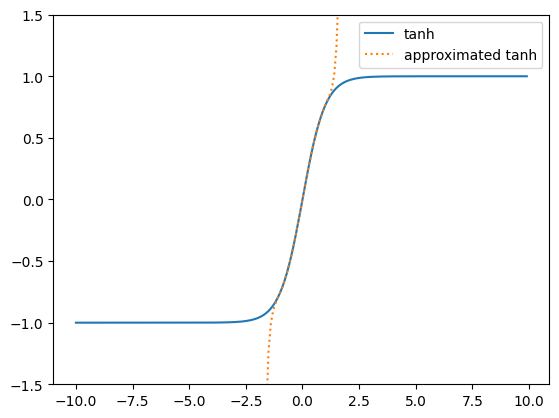

In [84]:
plt.plot(x, y, label='tanh')
plt.plot(x, y_approx, label='approximated tanh', linestyle='dotted')
plt.legend()
plt.ylim(-1.5, 1.5)
plt.show()

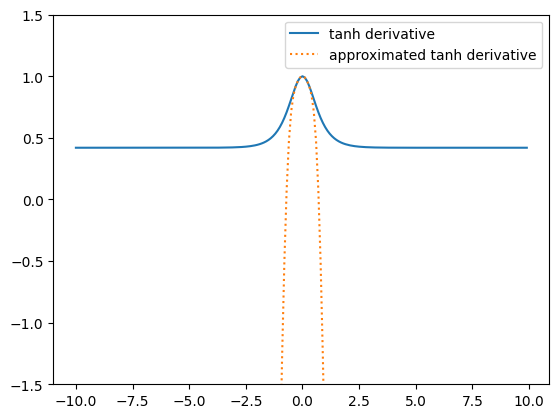

In [86]:
plt.plot(x, y_prime, label='tanh derivative')
plt.plot(x, y_prime_approx, label='approximated tanh derivative', linestyle='dotted')
plt.ylim(-1.5, 1.5)
plt.legend()
plt.show()

# ReLU Function

In [75]:
def ReLU(x):
    return np.maximum(0, x)

def approximated_ReLU(x):
    return x - x**3/6

def ReLU_derivative(x):
    return (x > 0).astype(int)

def approximated_ReLU_derivative(x):
    return (x > 0).astype(int)

In [76]:
x = np.arange(-10, 10, 0.1)
y = ReLU(x)
y_prime = ReLU_derivative(y)

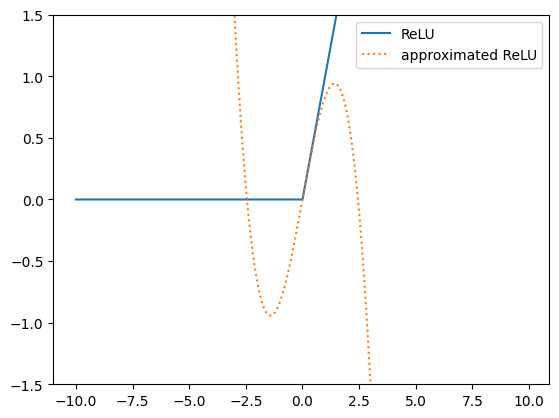

In [78]:
plt.plot(x, y, label='ReLU')
plt.plot(x, approximated_ReLU(x), label='approximated ReLU', linestyle='dotted')
plt.legend()
plt.ylim(-1.5, 1.5)
plt.show()

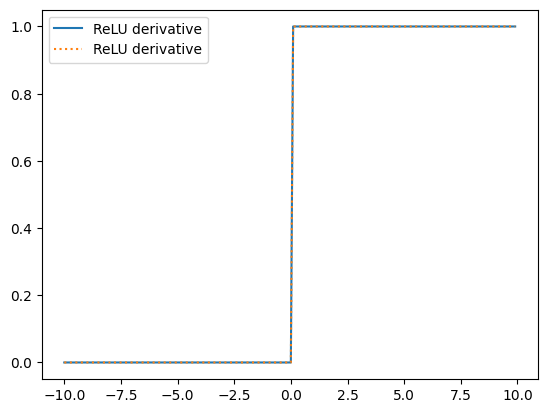

In [79]:
plt.plot(x, y_prime, label='ReLU derivative')
plt.plot(x, y_prime, label='ReLU derivative', linestyle='dotted')
plt.legend()
plt.show()

# Leaky ReLU Function

In [2]:
def leaky_ReLU(x, alpha=0.01):
    return np.maximum(alpha*x, x)

# GELU Function

In [ ]:
def GELU(x):
    return 0.5 * x * (1 + np.tanh(np.sqrt(2/np.pi) * (x + 0.044715 * x**3)))